In [1334]:
CLIENT_ID = 'TPODZ0AY5XEFZAKBYHAJPPFRS4HZRUJHQOFKW302YOXGVQFW' # my Foursquare ID
CLIENT_SECRET = 'GQUV3IGVGP0UTD5ALKGCX01JKE5DP1LXHQQAC1LUA11U3GSE' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [1335]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'University Latitude', 
                  'University Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1336]:
import pandas as pd
import requests

In [1337]:
data=pd.read_csv('data_prepared.csv')

In [1338]:
venues = getNearbyVenues(data['University'], data['Latitude'], data['Longitude'], radius=700)

Massachusetts Institute of Technology
Stanford University
Yale University
Harvard University
Princeton University
Duke University
Brown University
Columbia University
University of Pennsylvania
Rice University
Northwestern University
Vanderbilt University
Pomona College
Washington University in St. Louis
Dartmouth College
California Institute of Technology
University of Notre Dame
University of Chicago
University of Southern California
Cornell University
Bowdoin College
Amherst College
University of Michigan - Ann Arbor
Georgetown University
Tufts University
University of California - Los Angeles
Johns Hopkins University
Carnegie Mellon University
University of Virginia
Emory University
Haverford College
Carleton College
Middlebury College
Barnard College
Williams College
Washington & Lee University
Georgia Institute of Technology
Wellesley College
Swarthmore College
University of California - Berkeley
Wake Forest University
University of North Carolina at Chapel Hill
Northeastern Univ

In [1339]:
venues.shape

(2586, 7)

In [1340]:
venues.set_index('University').loc['Wesleyan University']

,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
University,,,,,,
Wesleyan University,41.555903,-72.655988,Pi Cafe,41.553540,-72.657780,Café
Wesleyan University,41.555903,-72.655988,Tuscany Grill,41.558896,-72.649391,Italian Restaurant
Wesleyan University,41.555903,-72.655988,Thai Gardens,41.559322,-72.649151,Thai Restaurant
Wesleyan University,41.555903,-72.655988,Klekolo World Coffee,41.560129,-72.650805,Coffee Shop
Wesleyan University,41.555903,-72.655988,Tandoor Indian Cousine,41.558885,-72.648669,Indian Restaurant
Wesleyan University,41.555903,-72.655988,The Pickle Stand,41.559113,-72.648946,Sandwich Place
Wesleyan University,41.555903,-72.655988,Brewbakers,41.558863,-72.648767,Breakfast Spot
Wesleyan University,41.555903,-72.655988,Freeman Athletic Center,41.551019,-72.660429,Gym / Fitness Center
Wesleyan University,41.555903,-72.655988,Red & Black Cafe,41.557392,-72.650572,Café


In [1341]:
colleges_onehot = pd.get_dummies(venues['Venue Category'])

In [1342]:
colleges_onehot['University'] = venues['University']

In [1343]:
colleges_onehot.groupby('University').count()

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Barnard College,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
Bates College,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Boston College,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Boston University,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington & Lee University,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Washington University in St. Louis,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Wellesley College,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [1344]:
venues_running_count = colleges_onehot.groupby('University').sum()

In [1345]:
data[~data.University.isin(venues_running_count.index.tolist())]

,Unnamed: 0,University,Rank,Small,Medium,Large,Public,Private,Liberal Arts,Total Cost of Attendance,...,Percentage of Nonresident Aliens to All Undergrads,Policy: Need-based,Policy: Merit,Policy: No Aid,Percentage of Nonresident Aliens Receiving Aid,Average Aid Award,Average Cost with Aid,Expected Cost,Latitude,Longitude
11,11,Vanderbilt University,12.0,False,True,False,False,True,False,71110.0,...,9.0,True,True,False,27.0,53134.0,17976.0,56740.0,37.708754,-85.547034
34,34,Williams College,35.0,True,False,False,False,True,True,75520.0,...,8.0,True,True,False,59.0,66066.0,9454.0,36215.0,42.709742,-73.239836
68,68,Bucknell University,70.0,False,True,False,False,False,True,75400.0,...,7.0,True,True,False,54.0,58757.0,16643.0,43932.0,35.512296,-87.374210


In [1346]:
venues_running_count[venues_running_count.sum(axis=1) > 5]

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
University,,,,,,,,,,,,,,,,,,,,,
Amherst College,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Barnard College,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Bates College,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boston College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boston University,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Washington University in St. Louis,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wellesley College,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1347]:
venues_counts = venues_running_count[venues_running_count.sum(axis=1) > 5]

In [1348]:
venues_counts['MUSEUM'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Museum')].tolist()].sum(axis=1)

/Users/ben/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1349]:
venues_counts['MUSEUM']

University
Amherst College                       2
Barnard College                       1
Bates College                         0
Boston College                        0
Boston University                     0
                                     ..
Wake Forest University                0
Washington University in St. Louis    0
Wellesley College                     1
Wesleyan University                   0
Yale University                       3
Name: MUSEUM, Length: 67, dtype: int64

In [1350]:
reduced = venues_counts

In [1351]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Museum')])

In [1352]:
reduced.columns[reduced.nunique() == 1]

Index(['Airport', 'College Science Building', 'Construction & Landscaping',
       'Moving Target'],
      dtype='object')

In [1353]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'American Restaurant',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arepa Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Belgian Restaurant',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Cajun / Creole Restaurant',
 'Candy Store',
 'Caribbean Restaura

In [1354]:
reduced.nunique()[reduced.columns.str.contains('Joint')]

BBQ Joint              2
Burger Joint           4
Fried Chicken Joint    2
Hot Dog Joint          2
Wings Joint            2
dtype: int64

In [1355]:
reduced['JOINT'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Joint')].tolist()].sum(axis=1)

In [1356]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Joint')])

In [1357]:
reduced.nunique()[reduced.columns.str.contains('Bookstore')]

Bookstore            5
College Bookstore    2
Used Bookstore       2
dtype: int64

In [1358]:
reduced['BOOKSTORE'] = venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Bookstore')].tolist()].sum(axis=1)

In [1359]:
reduced = reduced.drop(columns=venues_counts.columns[venues_counts.columns.str.contains('Bookstore')])

In [1360]:
input = venues_counts.columns.str.contains('Bookstore')

In [1361]:
venues_counts[venues_counts.columns[venues_counts.columns.str.contains('Place')].tolist()]

,Burrito Place,Pizza Place,Poke Place,Salad Place,Sandwich Place,Snack Place,Taco Place
University,,,,,,,
Amherst College,1,1,0,0,2,0,0
Barnard College,0,2,0,1,3,0,0
Bates College,0,0,0,0,0,0,0
Boston College,0,1,0,0,0,0,0
Boston University,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...
Wake Forest University,0,0,0,0,1,0,0
Washington University in St. Louis,0,1,0,0,0,0,0
Wellesley College,0,1,0,0,0,0,0


In [1362]:
reduced.sum()[reduced.columns.str.contains('Restaurant')]

American Restaurant                70
Arepa Restaurant                    1
Asian Restaurant                   17
Australian Restaurant               1
Belgian Restaurant                  1
Brazilian Restaurant                2
Cajun / Creole Restaurant           3
Caribbean Restaurant                4
Chinese Restaurant                 35
Comfort Food Restaurant             1
Cuban Restaurant                    3
Dim Sum Restaurant                  1
Donburi Restaurant                  1
Dumpling Restaurant                 2
Ethiopian Restaurant                3
Falafel Restaurant                  5
Fast Food Restaurant               30
French Restaurant                   8
Greek Restaurant                    6
Halal Restaurant                    1
Indian Restaurant                  23
Israeli Restaurant                  1
Italian Restaurant                 52
Japanese Curry Restaurant           1
Japanese Restaurant                20
Korean Restaurant                   8
Latin Americ

In [1363]:
reduced['COMMON RESTAURANT']=reduced[reduced.columns[reduced.sum() > 23][reduced.columns[reduced.sum() > 23].str.contains('Restaurant')]].sum(axis=1)

In [1364]:
reduced.drop(columns=reduced.columns[reduced.sum() > 23][reduced.columns[reduced.sum() > 23].str.contains('Restaurant')], inplace=True)

In [1365]:

reduced['NOVEL RESTAURANT']=reduced[reduced.columns[reduced.sum() < 8][reduced.columns[reduced.sum() < 8].str.contains('Restaurant')]].sum(axis=1)

In [1366]:

reduced.drop(columns=reduced.columns[reduced.sum() < 8][reduced.columns[reduced.sum() < 8].str.contains('Restaurant')], inplace=True)

In [1367]:
reduced['RESTAURANT']=reduced[reduced.columns[reduced.columns.str.contains('Restaurant')]].sum(axis=1)

In [1368]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Restaurant')], inplace=True)

In [1369]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Academic Building',
 'College Administrative Building',
 'College Arts Building',
 'College Auditorium',
 'Col

In [1370]:
reduced['GYM']=reduced[reduced.columns[reduced.columns.str.contains('Gym')][2:]].sum(axis=1)

In [1371]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Gym')][2:], inplace=True)

In [1372]:

reduced['THEATER']=reduced[reduced.columns[reduced.columns.str.contains('Theater')]].sum(axis=1)

In [1373]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Theater')], inplace=True)

In [1374]:
reduced['THEATER'] += reduced['College Auditorium']

In [1375]:
reduced.drop(columns='College Auditorium', inplace=True)

In [1376]:
reduced['STADIUM'] = reduced[reduced.columns[reduced.columns.str.contains('Stadium')]].sum(axis=1)

In [1377]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Stadium')], inplace=True)

In [1378]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('College')], inplace=True)

In [1379]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Auto Garage',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',


In [1380]:
reduced['VENUE']=reduced[reduced.columns[reduced.columns.str.contains('Venue')]].sum(axis=1)

In [1381]:
reduced.drop(columns=reduced.columns[reduced.columns.str.contains('Venue')],inplace=True)

In [1382]:
reduced.sum().sort_values(ascending=False).head(115)

COMMON RESTAURANT    276
RESTAURANT           175
Coffee Shop          149
Café                 108
Sandwich Place        84
                    ... 
Flower Shop            3
Dog Run                3
Doctor's Office        3
Dive Bar               3
Rock Club              3
Length: 115, dtype: int64

In [1383]:
reduced['GYM'] += reduced['Pool']

In [1384]:
reduced.drop(columns='Pool', inplace=True)

In [1385]:
reduced['LIQUOR'] = reduced['Liquor Store'] + reduced['Wine Shop']

In [1386]:
reduced.drop(columns=['Liquor Store', 'Wine Shop'], inplace=True)

In [1387]:
reduced['TACO'] = reduced['Taco Place'] + reduced['Burrito Place']

In [1388]:
reduced.drop(columns=['Taco Place', 'Burrito Place'], inplace=True)

In [1389]:
reduced['VENUE'] += reduced['Rock Club']

In [1390]:
reduced.drop(columns='Rock Club', inplace=True)

In [1391]:
reduced['PUB'] = reduced['Irish Pub'] + reduced['Pub']

In [1392]:
reduced.drop(columns=['Irish Pub', 'Pub'], inplace=True)

In [1393]:
reduced.columns[reduced.columns.str.contains('Bar')]

Index(['Bar', 'Beach Bar', 'Beer Bar', 'Cocktail Bar', 'Dive Bar',
       'Hookah Bar', 'Hotel Bar', 'Juice Bar', 'Karaoke Bar', 'Sake Bar',
       'Salon / Barbershop', 'Sports Bar', 'Wine Bar'],
      dtype='object')

In [1394]:
reduced['PUB'] += reduced['Sports Bar']+ reduced['Beer Bar'] + reduced['Dive Bar']

In [1395]:
reduced.drop(columns=['Sports Bar', 'Beer Bar', 'Dive Bar'], inplace=True)

In [1396]:
reduced.columns[reduced.columns.str.contains('Bar')]

Index(['Bar', 'Beach Bar', 'Cocktail Bar', 'Hookah Bar', 'Hotel Bar',
       'Juice Bar', 'Karaoke Bar', 'Sake Bar', 'Salon / Barbershop',
       'Wine Bar'],
      dtype='object')

In [1397]:
reduced['PUB'] += reduced['Bar']

In [1398]:
reduced.drop(columns='Bar', inplace=True)

In [1399]:
reduced['FANCY BAR'] = reduced['Beach Bar'] + reduced['Cocktail Bar'] + reduced['Hotel Bar'] + reduced['Sake Bar'] + reduced['Wine Bar']

In [1400]:
reduced.drop(columns=['Beach Bar', 'Cocktail Bar', 'Hotel Bar', 'Sake Bar', 'Wine Bar'], inplace=True)

In [1401]:
reduced.columns[reduced.columns.str.contains('Auto')]

Index(['Auto Garage', 'Automotive Shop'], dtype='object')

In [1402]:
reduced.sum()[reduced.columns.str.contains('Bar')]

Hookah Bar             4
Juice Bar             14
Karaoke Bar            2
Salon / Barbershop    13
dtype: int64

In [1403]:
reduced.drop(columns=['Automotive Shop', 'Auto Garage'], inplace=True)

In [1404]:
reduced.columns[reduced.columns.str.contains('Store')]

Index(['Accessories Store', 'Arts & Crafts Store', 'Beer Store',
       'Big Box Store', 'Candy Store', 'Clothing Store', 'Convenience Store',
       'Department Store', 'Discount Store', 'Electronics Store',
       'Furniture / Home Store', 'Grocery Store', 'Hardware Store',
       'Jewelry Store', 'Lingerie Store', 'Luggage Store', 'Mattress Store',
       'Men's Store', 'Music Store', 'Outdoor Supply Store',
       'Paper / Office Supplies Store', 'Pet Store', 'Shipping Store',
       'Shoe Store', 'Stationery Store', 'Thrift / Vintage Store',
       'Toy / Game Store', 'Video Game Store', 'Video Store', 'Women's Store'],
      dtype='object')

In [1405]:
reduced['LIQUOR'] += reduced['Beer Store']

In [1406]:
reduced.drop(columns='Beer Store', inplace=True)

In [1407]:
reduced['STATIONERY'] = reduced['Stationery Store'] + reduced['Paper / Office Supplies Store']

In [1408]:
reduced.drop(columns=['Stationery Store', 'Paper / Office Supplies Store'], inplace=True)

In [1409]:
reduced.columns[reduced.columns.str.contains('Shop')]

Index(['Antique Shop', 'Bagel Shop', 'Bike Shop', 'Board Shop',
       'Bubble Tea Shop', 'Cheese Shop', 'Chocolate Shop', 'Coffee Shop',
       'Comic Shop', 'Cosmetics Shop', 'Cupcake Shop', 'Dessert Shop',
       'Donut Shop', 'Flower Shop', 'Food & Drink Shop', 'Frozen Yogurt Shop',
       'Gift Shop', 'Gourmet Shop', 'Hobby Shop', 'Ice Cream Shop',
       'Miscellaneous Shop', 'Mobile Phone Shop', 'Optical Shop',
       'Pastry Shop', 'Pie Shop', 'Record Shop', 'Shopping Mall',
       'Shopping Plaza', 'Smoke Shop', 'Smoothie Shop', 'Sporting Goods Shop',
       'Supplement Shop'],
      dtype='object')

In [1410]:
reduced['PLAZA'] = reduced['Shopping Plaza'] + reduced['Plaza']

In [1411]:
reduced.drop(columns=['Shopping Plaza', 'Plaza'], inplace=True)

In [1412]:
reduced['PASTRY'] = reduced['Pastry Shop'] + reduced['Pie Shop']

In [1413]:
reduced.drop(columns=['Pastry Shop', 'Pie Shop'], inplace=True)

In [1414]:
reduced.columns[reduced.sum() < 10].tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Brewery',
 'Bus Line',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Candy Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Comedy Club',
 'Comic Shop',
 'Construction & Landscaping',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Department Store',
 'Discount Store',
 "Doctor's Office",
 'Dog Run',
 'Dry Cleaner',
 'Electronics Store',
 'Field',
 'Flower Shop',
 'Food',
 'Food & Drink Shop',
 'Food Service',
 'Fountain',
 'Fraternity House',
 'Furniture / Home Store',
 

In [1415]:
reduced['VENUE'] += reduced['Jazz Club']

In [1416]:
reduced.drop(columns='Jazz Club', inplace=True)

In [1417]:
reduced['TRAIL'] = reduced['Bike Trail'] + reduced['Trail']

In [1418]:
reduced.drop(columns=['Bike Trail', 'Trail'], inplace=True)

In [1419]:
reduced['STADIUM'] += reduced['Hockey Arena']

In [1420]:
reduced.drop(columns=['Hockey Arena'], inplace=True)

In [1421]:
reduced['THRIFT'] = reduced['Thrift / Vintage Store'] 

In [1423]:
reduced.drop(columns=['Thrift / Vintage Store'], inplace=True)

In [1424]:
reduced['RESTAURANT'] += reduced['Bistro']
reduced.drop(columns='Bistro', inplace=True)

In [1425]:
reduced['BUS'] = reduced['Bus Line'] + reduced['Bus Station'] + reduced['Bus Stop']
reduced.drop(columns=['Bus Line', 'Bus Station', 'Bus Stop'], inplace=True)

In [1426]:
reduced[reduced['Light Rail Station'] == 1]

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,LIQUOR,TACO,PUB,FANCY BAR,STATIONERY,PLAZA,PASTRY,TRAIL,THRIFT,BUS
University,,,,,,,,,,,,,,,,,,,,,
Case Western Reserve University,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0


In [1427]:
reduced.sum()[reduced.columns.str.contains('Monument')]

Monument / Landmark    4
dtype: int64

In [1428]:
reduced['HISTORIC'] = reduced['Monument / Landmark'] + reduced['Historic Site']
reduced.drop(columns=['Monument / Landmark', 'Historic Site'], inplace=True)

In [1429]:
reduced['RESTAURANT'] += reduced['Steakhouse']
reduced.drop(columns='Steakhouse', inplace=True)

In [1430]:
reduced['TRAIN'] = reduced['Light Rail Station'] + reduced['Train Station']
reduced.drop(columns=['Light Rail Station', 'Train Station'], inplace=True)

In [1431]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 "Doctor's Office",
 'Dog Run',
 'Donut 

In [1432]:
reduced[reduced['Amphitheater'] == 1]

,ATM,Accessories Store,Airport,Amphitheater,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,PUB,FANCY BAR,STATIONERY,PLAZA,PASTRY,TRAIL,THRIFT,BUS,HISTORIC,TRAIN
University,,,,,,,,,,,,,,,,,,,,,
University of Southern California,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1433]:
venues_counts[venues_counts['Plaza'] == 1]

,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,MUSEUM
University,,,,,,,,,,,,,,,,,,,,,
Bowdoin College,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
Brown University,0,0,0,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,2
California Institute of Technology,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Carnegie Mellon University,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Georgia Institute of Technology,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Lehigh University,0,0,0,3,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
Massachusetts Institute of Technology,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
Northeastern University,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,3
Pomona College,0,0,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1434]:
reduced.drop(columns='PLAZA', inplace=True)

In [1435]:
reduced['SQUARE'] = venues_counts['College Quad'] + venues_counts['Plaza']
reduced['Shopping Plaza'] = venues_counts['Shopping Plaza']

In [1436]:
reduced['SHOPPING'] = reduced['Shopping Plaza'] + reduced['Shopping Mall']
reduced.drop(columns=['Shopping Plaza', 'Shopping Mall'], inplace=True)

In [1437]:
reduced.columns[reduced.sum() < 5]

Index(['ATM', 'Accessories Store', 'Airport', 'Amphitheater', 'Antique Shop',
       'Aquarium', 'Arcade', 'Arts & Entertainment', 'Basketball Court',
       'Beach',
       ...
       'Tattoo Parlor', 'Toy / Game Store', 'Track', 'Video Game Store',
       'Video Store', 'Volleyball Court', 'Women's Store', 'PASTRY', 'TRAIN',
       'SHOPPING'],
      dtype='object', length=116)

In [1438]:
reduced.drop(columns=['Neighborhood'], inplace=True)

In [1439]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Art Gallery',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Beach',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Board Shop',
 'Boat or Ferry',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Cheese Shop',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 "Doctor's Office",
 'Dog Run',
 'Donut 

In [1440]:
beauty = ['Lake', 'Beach', 'Boat or Ferry', 'Garden', 'Botanical Garden', 'Harbor / Marina', 'Scenic Lookout', 'Sculpture Garden']
reduced['BEAUTY'] = reduced[beauty].sum(axis=1)

In [1441]:
reduced.drop(columns=beauty, inplace=True)

In [1442]:
reduced['BEAUTY'] += reduced['Golf Course'] + reduced['Resort']
reduced.drop(columns=['Golf Course', 'Resort'], inplace=True)

In [1443]:
reduced['MUSEUM'] += reduced['Other Great Outdoors']
reduced.drop(columns='Other Great Outdoors', inplace=True)

In [1444]:
reduced['ART'] = reduced['Art Gallery'] + venues_counts['Sculpture Garden'] + reduced['Public Art'] + venues_counts['Art Museum']
reduced.drop(columns=['Art Gallery', 'Public Art'], inplace=True)

In [1445]:
posh_food=['Cheese Shop', 'Chocolate Shop', 'Organic Grocery', 'Farmers Market', 'Market', 'Supplement Shop']

In [1446]:
reduced['FANCY_FOOD'] = reduced[posh_food].sum(axis=1)

In [1447]:
reduced.drop(columns=posh_food, inplace=True)

In [1448]:
reduced['ART'] += reduced['Outdoor Sculpture']

In [1449]:
reduced.drop(columns='Outdoor Sculpture', inplace=True)

In [1450]:
reduced.columns.tolist()

['ATM',
 'Accessories Store',
 'Airport',
 'Amphitheater',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Arts & Crafts Store',
 'Arts & Entertainment',
 'Athletics & Sports',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Baseball Field',
 'Basketball Court',
 'Bed & Breakfast',
 'Beer Garden',
 'Big Box Store',
 'Bike Rental / Bike Share',
 'Bike Shop',
 'Board Shop',
 'Boutique',
 'Bowling Alley',
 'Boxing Gym',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',
 'Candy Store',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'Comedy Club',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cupcake Shop',
 'Cycle Studio',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 "Doctor's Office",
 'Dog Run',
 'Donut Shop',
 'Dry Cleaner',
 'Electronics Store',
 'Field',
 'Flower Shop',
 'Food',
 'Food & Drink Shop'

In [1451]:
reduced['FANCY_FOOD'] += reduced['Gourmet Shop']
reduced.drop(columns='Gourmet Shop', inplace=True)

In [1452]:
reduced['SQUARE'] += reduced['Pedestrian Plaza']
reduced.drop(columns='Pedestrian Plaza', inplace=True)

In [1453]:
reduced.columns[reduced.sum() < 5]

Index(['ATM', 'Accessories Store', 'Airport', 'Amphitheater', 'Antique Shop',
       'Aquarium', 'Arcade', 'Arts & Entertainment', 'Basketball Court',
       'Bed & Breakfast', 'Beer Garden', 'Big Box Store',
       'Bike Rental / Bike Share', 'Bike Shop', 'Board Shop', 'Bowling Alley',
       'Boxing Gym', 'Business Service', 'Butcher', 'Cafeteria', 'Candy Store',
       'Church', 'Climbing Gym', 'Comedy Club', 'Comic Shop',
       'Construction & Landscaping', 'Cosmetics Shop', 'Creperie',
       'Cycle Studio', 'Dance Studio', 'Department Store', 'Discount Store',
       'Doctor's Office', 'Dog Run', 'Dry Cleaner', 'Electronics Store',
       'Field', 'Flower Shop', 'Food', 'Food & Drink Shop', 'Food Service',
       'Fraternity House', 'Furniture / Home Store', 'Gaming Cafe',
       'Garden Center', 'Gas Station', 'General Entertainment',
       'Hardware Store', 'Hobby Shop', 'Hockey Field', 'Home Service',
       'Hookah Bar', 'Insurance Office', 'Intersection', 'Jewelry Store',


In [1454]:
reduced['VENUE'] += reduced['Comedy Club']
reduced.drop(columns='Comedy Club', inplace=True)

In [1455]:
reduced['JUICE'] = reduced['Juice Bar'] + reduced['Smoothie Shop']
reduced.drop(columns=['Juice Bar', 'Smoothie Shop'], inplace=True)

In [1456]:
reduced['EASY FOOD'] = reduced['Food Truck'] +  reduced['TACO'] 
reduced.drop(columns=['Food Truck', 'TACO' ], inplace=True)

In [1457]:
reduced['GROCERY'] = reduced['Grocery Store'] + reduced['Supermarket']
reduced.drop(columns=['Grocery Store', 'Supermarket'], inplace=True)

In [1458]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Athletics & Sports', 'Bagel Shop', 'Bakery',
       'Bank', 'Boutique', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop',
       'Café', 'Clothing Store', 'Coffee Shop', 'Concert Hall',
       'Convenience Store', 'Deli / Bodega', 'Dessert Shop', 'Diner',
       'Donut Shop', 'Food Court', 'Fountain', 'Frozen Yogurt Shop',
       'Gastropub', 'Gift Shop', 'Hotel', 'Ice Cream Shop',
       'Mobile Phone Shop', 'Noodle House', 'Park', 'Pharmacy', 'Pizza Place',
       'Record Shop', 'Rental Car Location', 'Salad Place',
       'Salon / Barbershop', 'Sandwich Place', 'Shipping Store', 'Smoke Shop',
       'Snack Place', 'Spa', 'Sporting Goods Shop', 'Student Center',
       'Tea Room', 'Tennis Court', 'Yoga Studio', 'MUSEUM', 'JOINT',
       'BOOKSTORE', 'COMMON RESTAURANT', 'NOVEL RESTAURANT', 'RESTAURANT',
       'GYM', 'THEATER', 'STADIUM', 'VENUE', 'LIQUOR', 'PUB', 'FANCY BAR',
       'STATIONERY', 'TRAIL', 'BUS', 'HISTORIC', 'SQUARE', 'BEAUTY', 'ART',
   

In [1459]:
reduced.drop(columns=['Athletics & Sports','Tennis Court', 'Playground', 'Rental Car Location'], inplace=True)

In [1460]:
reduced['EASY FOOD'] += reduced['Snack Place']
reduced.drop(columns='Snack Place', inplace=True)

In [1461]:
reduced['SWEETS'] = reduced['Donut Shop'] + reduced['Dessert Shop'] + reduced['Cupcake Shop'] + reduced['Frozen Yogurt Shop']
reduced.drop(columns=['Donut Shop', 'Dessert Shop', 'Cupcake Shop', 'Frozen Yogurt Shop'], inplace=True)

In [1462]:
reduced['SWEETS'] += reduced['Ice Cream Shop']
reduced.drop(columns='Ice Cream Shop', inplace=True)

In [1463]:
reduced['EASY FOOD'] += reduced['JOINT']
reduced.drop(columns='JOINT', inplace=True)

In [1464]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Boutique',
       'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Café',
       'Clothing Store', 'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Deli / Bodega', 'Diner', 'Food Court', 'Fountain', 'Gastropub',
       'Gift Shop', 'Hotel', 'Mobile Phone Shop', 'Noodle House', 'Park',
       'Pharmacy', 'Pizza Place', 'Record Shop', 'Salad Place',
       'Salon / Barbershop', 'Sandwich Place', 'Shipping Store', 'Smoke Shop',
       'Spa', 'Sporting Goods Shop', 'Student Center', 'Tea Room',
       'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON RESTAURANT',
       'NOVEL RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY BAR', 'STATIONERY', 'TRAIL', 'BUS', 'HISTORIC',
       'SQUARE', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE', 'EASY FOOD',
       'GROCERY', 'SWEETS'],
      dtype='object')

In [1465]:
reduced.drop(columns='Baseball Field', inplace=True)

In [1466]:
reduced['EASY FOOD'] += reduced['Food Court']
reduced.drop(columns='Food Court', inplace=True)

In [1467]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Boutique',
       'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Café',
       'Clothing Store', 'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Deli / Bodega', 'Diner', 'Fountain', 'Gastropub', 'Gift Shop', 'Hotel',
       'Mobile Phone Shop', 'Noodle House', 'Park', 'Pharmacy', 'Pizza Place',
       'Record Shop', 'Salad Place', 'Salon / Barbershop', 'Sandwich Place',
       'Shipping Store', 'Smoke Shop', 'Spa', 'Sporting Goods Shop',
       'Student Center', 'Tea Room', 'Yoga Studio', 'MUSEUM', 'BOOKSTORE',
       'COMMON RESTAURANT', 'NOVEL RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER',
       'STADIUM', 'VENUE', 'LIQUOR', 'PUB', 'FANCY BAR', 'STATIONERY', 'TRAIL',
       'BUS', 'HISTORIC', 'SQUARE', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE',
       'EASY FOOD', 'GROCERY', 'SWEETS'],
      dtype='object')

In [1469]:
reduced['SANDWICH'] = reduced['Sandwich Place'] + reduced['Deli / Bodega']
reduced.drop(columns=['Sandwich Place', 'Deli / Bodega'], inplace=True)

In [1470]:
reduced.columns[reduced.sum() > 4]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Boutique',
       'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Café',
       'Clothing Store', 'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Diner', 'Fountain', 'Gastropub', 'Gift Shop',
       'Health & Beauty Service', 'Hotel', 'Mobile Phone Shop', 'Noodle House',
       'Park', 'Pharmacy', 'Pizza Place', 'Poke Place', 'Record Shop',
       'Salad Place', 'Salon / Barbershop', 'Shipping Store', 'Smoke Shop',
       'Spa', 'Sporting Goods Shop', 'Student Center', 'Tea Room',
       'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON RESTAURANT',
       'NOVEL RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY BAR', 'STATIONERY', 'TRAIL', 'THRIFT', 'BUS',
       'HISTORIC', 'SQUARE', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE',
       'EASY FOOD', 'GROCERY', 'SWEETS', 'SANDWICH'],
      dtype='object')

In [1471]:
reduced.drop(columns='Boutique', inplace=True)

In [1472]:
reduced['SHOPPING'] += reduced['Clothing Store']
reduced.drop(columns='Clothing Store', inplace=True)

In [1473]:
reduced['BEAUTY'] +=reduced['Fountain']
reduced.drop(columns='Fountain', inplace=True)

In [1474]:
reduced['COFFEE'] = reduced['Coffee Shop'] +reduced['Café']
reduced.drop(columns=['Coffee Shop', 'Café'], inplace=True)

In [1475]:
reduced.columns[reduced.sum() > 5]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Concert Hall', 'Convenience Store',
       'Diner', 'Gastropub', 'Gift Shop', 'Hotel', 'Mobile Phone Shop',
       'Noodle House', 'Park', 'Pharmacy', 'Pizza Place', 'Record Shop',
       'Salad Place', 'Salon / Barbershop', 'Shipping Store', 'Smoke Shop',
       'Spa', 'Sporting Goods Shop', 'Student Center', 'Tea Room',
       'Yoga Studio', 'MUSEUM', 'BOOKSTORE', 'COMMON RESTAURANT',
       'NOVEL RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER', 'STADIUM', 'VENUE',
       'LIQUOR', 'PUB', 'FANCY BAR', 'STATIONERY', 'TRAIL', 'BUS', 'HISTORIC',
       'SQUARE', 'SHOPPING', 'BEAUTY', 'ART', 'FANCY_FOOD', 'JUICE',
       'EASY FOOD', 'GROCERY', 'SWEETS', 'SANDWICH', 'COFFEE'],
      dtype='object')

In [1476]:
reduced.columns[reduced.sum() > 4]

Index(['Arts & Crafts Store', 'Bagel Shop', 'Bakery', 'Bank', 'Breakfast Spot',
       'Brewery', 'Bubble Tea Shop', 'Concert Hall', 'Convenience Store',
       'Diner', 'Gastropub', 'Gift Shop', 'Health & Beauty Service', 'Hotel',
       'Mobile Phone Shop', 'Noodle House', 'Park', 'Pharmacy', 'Pizza Place',
       'Poke Place', 'Record Shop', 'Salad Place', 'Salon / Barbershop',
       'Shipping Store', 'Smoke Shop', 'Spa', 'Sporting Goods Shop',
       'Student Center', 'Tea Room', 'Yoga Studio', 'MUSEUM', 'BOOKSTORE',
       'COMMON RESTAURANT', 'NOVEL RESTAURANT', 'RESTAURANT', 'GYM', 'THEATER',
       'STADIUM', 'VENUE', 'LIQUOR', 'PUB', 'FANCY BAR', 'STATIONERY', 'TRAIL',
       'THRIFT', 'BUS', 'HISTORIC', 'SQUARE', 'SHOPPING', 'BEAUTY', 'ART',
       'FANCY_FOOD', 'JUICE', 'EASY FOOD', 'GROCERY', 'SWEETS', 'SANDWICH',
       'COFFEE'],
      dtype='object')

In [1477]:
venues[venues['Venue Category'] == 'Miscellaneous Shop']

,University,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
318,Brown University,41.826854,-71.402288,Spectrum India,41.828568,-71.400807,Miscellaneous Shop
1050,University of Michigan - Ann Arbor,42.278857,-83.734255,Nickels Arcade,42.278387,-83.741529,Miscellaneous Shop
1705,New York University,40.729253,-73.996254,MUJI,40.728645,-73.991321,Miscellaneous Shop
2257,Cooper Union,40.729528,-73.990561,MUJI,40.728645,-73.991321,Miscellaneous Shop


In [1478]:
reduced.drop(columns=['Miscellaneous Shop'], inplace = True)

In [1479]:
reduced_abridged = reduced[reduced.columns[reduced.sum() > 5]]

In [1480]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [1481]:
reduced_abridged.sum(axis=0).shape

(55,)

In [1482]:
scaler = StandardScaler()
scaler.fit(reduced_abridged)
data_prepared = scaler.transform(reduced_abridged)
columns = pd.DataFrame(data_prepared, index=reduced_abridged.index, columns=reduced_abridged.columns)

In [1483]:
scaled = columns * np.sqrt(reduced_abridged.sum(axis=0))

In [1484]:
full_scaled = columns * reduced_abridged.sum(axis=0)

In [1485]:
scaled['COFFEE']

University
Amherst College                      -15.995811
Barnard College                       12.207329
Bates College                        -21.636439
Boston College                       -10.355183
Boston University                      6.566701
                                        ...    
Wake Forest University                -4.714555
Washington University in St. Louis   -10.355183
Wellesley College                    -21.636439
Wesleyan University                   -4.714555
Yale University                        6.566701
Name: COFFEE, Length: 67, dtype: float64

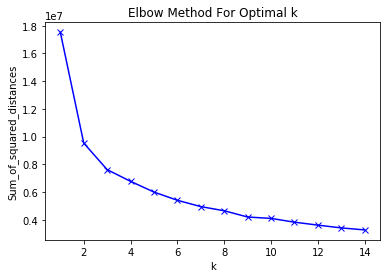

In [1547]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(full_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1593]:
km = KMeans(n_clusters=5, random_state=3)
km.fit(full_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [1602]:
reduced_abridged.reset_index()['University'][km.labels_ == 0]

16                        Cornell University
20                     Georgetown University
39                       Stanford University
43    University of California - Los Angeles
45                     University of Chicago
57              University of Texas - Austin
Name: University, dtype: object

In [1530]:
reduced_abridged.to_csv('venues_data.csv')